In [1]:
from turb.lesgo_utils import *
import numpy as np
import matplotlib.pyplot as plt
import pyutils.plot_utils as pltutils

from pyutils.cartesian import meshgrid

# Forward Simulation

# Generate IC files in input directory

In [2]:
root_dir = '/home/zyou6474/tasks/demo_foward'
dims = [128, 128, 64]
domain = [2*np.pi, np.pi, 1]
t_total = 5000
nk = 2
tt = np.arange(0, t_total + 1, 100)

ldata = lesgo_data(domain, dims, root_dir, ntheta=3)

In [3]:
ldata.install_lesgo()

fatal: destination path '/home/zyou6474/tasks/demo_foward/lesgo' already exists and is not an empty directory.
HEAD is now at 6c4a959... update


/home/zyou6474/tasks/demo_foward/lesgo/src/input_util.f90(929): warning #6843: A dummy argument with an explicit INTENT(OUT) declaration is not given an explicit value.   [NELEM]
subroutine parse_vector_real( string, nelem, vector )
--------------------------------------^


-- The Fortran compiler identification is Intel 18.0.2.20180210
-- Check for working Fortran compiler: /nas/app/intel/compilers_and_libraries_2018.2.199/linux/bin/intel64/ifort
-- Check for working Fortran compiler: /nas/app/intel/compilers_and_libraries_2018.2.199/linux/bin/intel64/ifort  -- works
-- Detecting Fortran compiler ABI info
-- Detecting Fortran compiler ABI info - done
-- Checking whether /nas/app/intel/compilers_and_libraries_2018.2.199/linux/bin/intel64/ifort supports Fortran 90
-- Checking whether /nas/app/intel/compilers_and_libraries_2018.2.199/linux/bin/intel64/ifort supports Fortran 90 -- yes
-- The C compiler identification is Intel 18.0.2.20180210
-- The CXX compiler identification is Intel 18.0.2.20180210
-- Check for working C compiler: /nas/app/intel/compilers_and_libraries_2018.2.199/linux/bin/intel64/icc
-- Check for working C compiler: /nas/app/intel/compilers_and_libraries_2018.2.199/linux/bin/intel64/icc -- works
-- Detecting C compiler ABI info
-- Detecti

In [4]:
ldata._write_conf('./test.ini')

Configs is written in ./test.ini


In [5]:
# Read previous velocity field as Initial Condition
ldata.read_inputs('/home/zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/inputs/turbulence_128_128_64')

# Create Unit Gaussian Pulse Field as Initial Condition
mesh = meshgrid(domain, dims)
thetaic_shape = dims*1
thetaic_shape.insert(0, 1)
thetaic_shape = tuple(thetaic_shape)
ldata.data['theta_ic'] = np.empty(shape = thetaic_shape) 
ldata.data['theta_ic'][0] = unit_gaussian(mesh, [1, 1, 0.5], 1e-1)

# Switch off Scalar source
ldata.config['SCALAR']['source_opt'] = '0'
ldata._fnames(fmt_ntheta='%.3i')
ldata.write_inputs()

write data into /home/zyou6474/tasks/demo_foward/inputs/u_velocity.IC
write data into /home/zyou6474/tasks/demo_foward/inputs/v_velocity.IC
write data into /home/zyou6474/tasks/demo_foward/inputs/w_velocity.IC
write data into /home/zyou6474/tasks/demo_foward/inputs/theta.IC.001
Configs is written in /home/zyou6474/tasks/demo_foward/inputs/lesgo.conf


In [6]:
# ldata.gaussian_field(fieldname = 'theta.IC', nk=1, source_point = [np.pi*5/3, np.pi/2, 1/2], gen_fig=False, variance=1e-2)
# ldata.gaussian_field(fieldname = 'theta.IC', nk=2, source_point = [np.pi*5/3, np.pi/2, 1/3], gen_fig=False, variance=1e-2)
# ldata.gaussian_field(fieldname = 'theta.IC', nk=3, source_point = [np.pi*5/3, np.pi/2, 2/3], gen_fig=True, variance=1e-2)

Change the output format through lesgo_data._fnames

In [7]:

# ldata.constant_field(fieldname = 'theta.IC', nk=1, gen_fig=False)
# ldata.constant_field(fieldname = 'theta.IC', nk=2, gen_fig=False)
# ldata.constant_field(fieldname = 'theta.IC', nk=3, gen_fig=True)
# ldata.gaussian_field(fieldname = 'source', nk=1, source_point = [np.pi*1/3, np.pi/2, 1/2], gen_fig=False, variance=5e-2)
# ldata.gaussian_field(fieldname = 'source', nk=2, source_point = [np.pi*1/2, np.pi/2, 1/2], gen_fig=False, variance=5e-2)
# ldata.gaussian_field(fieldname = 'source', nk=3, source_point = [np.pi*2/3, np.pi/2, 1/2], gen_fig=True, variance=5e-2)

write data into /home/zyou6474/tasks/demo_foward/inputs/theta.IC.001
write data into /home/zyou6474/tasks/demo_foward/inputs/theta.IC.002
write data into /home/zyou6474/tasks/demo_foward/inputs/theta.IC.003
write data into /home/zyou6474/tasks/demo_foward/inputs/source.001
write data into /home/zyou6474/tasks/demo_foward/inputs/source.002


KeyboardInterrupt: 

## Read data from forward simulation

In [ ]:
ldata.read_data(t_ind=1)
ldata.data['theta'].shape

(3, 128, 128, 64)

## Read data at given sensor locations from simulation results

In [ ]:
from matplotlib import cm, colors
# Sensor Location
sx = (5/3*np.pi, 5/3*np.pi, 5/3*np.pi)
sy = (1/2*np.pi, 1/2*np.pi, 1/2*np.pi)
sz = (1/2, 1/3, 2/3)

sensor_locs = (sx, sy, sz)

In [ ]:
ldata.sensor_measurements(sensor_locs, tt, vmin=1e-3, vmax=1e-1, norm=colors.AsinhNorm, gen_gif=True, nk = nk)

gif written in ./result_002_2023_07_10.gif


# Backward Simulation

In [ ]:
adjoint_dir = '/home/zyou6474/tasks/demo_adjoint'
ldata.set_adjoint(adjoint=True, adjoint_dir=adjoint_dir)
ldata._fnames(fmt_ntheta='%.3i')

ldata.sensor_init_(sensor_locs)

ldata.sensor_field()
ldata.sensor_field(field_func = ldata.constant_field, fieldname='theta.IC')

write data into /home/zyou6474/tasks/demo_adjoint/inputs/source.001
write data into /home/zyou6474/tasks/demo_adjoint/inputs/source.002
write data into /home/zyou6474/tasks/demo_adjoint/inputs/source.003
write data into /home/zyou6474/tasks/demo_adjoint/inputs/source.001
write data into /home/zyou6474/tasks/demo_adjoint/inputs/source.002
write data into /home/zyou6474/tasks/demo_adjoint/inputs/source.003
write data into /home/zyou6474/tasks/demo_adjoint/inputs/theta.IC.001
write data into /home/zyou6474/tasks/demo_adjoint/inputs/theta.IC.002
write data into /home/zyou6474/tasks/demo_adjoint/inputs/theta.IC.003
write data into /home/zyou6474/tasks/demo_adjoint/inputs/theta.IC.001
write data into /home/zyou6474/tasks/demo_adjoint/inputs/theta.IC.002
write data into /home/zyou6474/tasks/demo_adjoint/inputs/theta.IC.003


[array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


In [ ]:
ldata.adjoint_intersect(adjoint_tend = 2100, gif_fname='./imgs/adjoint_intersect', vmin = 0, vmax = 5e-2)

/home/zyou6474/.venv/lib/python3.10/site-packages/python_utils-0.1.0-py3.10.egg/turb/lesgo_utils.py:539: RuntimeWarning: invalid value encountered in divide


gif written in adjoint_intersect_002_2023_07_10.gif


In [ ]:
ldata.read_sensor_adjoint(t_ind=1000)

In [ ]:
def normal(data):
    vmin = data.min()
    vmax = data.max()
    data =  (data - vmin) /  (vmax - vmin)
    return data

In [ ]:
ldata.data['adjoint'].max()

0.01901221146837118

In [ ]:
ldata.data['adjoint'].min()

-0.006728332766272865

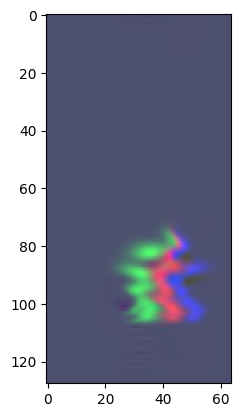

In [ ]:
z = np.zeros(shape=(128, 64, 4))
z[:, :, 0] = normal(ldata.data['adjoint'][0, 0, :, 64, :])
z[:, :, 1] = normal(ldata.data['adjoint'][0, 1, :, 64, :])
# z[:, :, 2] = normal(ldata.data['adjoint'][0, 2, :, 64, :])
z[:, :, 2] = normal(ldata.data['adjoint'][0, 2, :, 64, :])
z[:, :, 3] = 0.8

plt.imshow(z,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


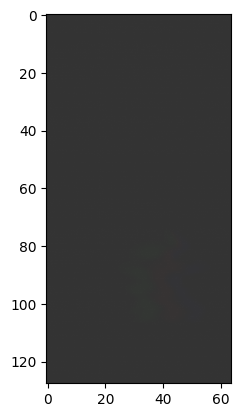

In [ ]:
z = np.zeros(shape=(128, 64, 4))
z[:, :, 0] = ldata.data['adjoint'][0, 0, :, 64, :]
z[:, :, 1] = ldata.data['adjoint'][0, 1, :, 64, :]
z[:, :, 2] = ldata.data['adjoint'][0, 2, :, 64, :]
z[:, :, 3] = 0.8

plt.imshow(z, norm=colors.Normalize(vmin =0, vmax = 1e-2, clip=True))